# Explore here

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [8]:
for column in df.columns:
    if df[column].dtype == 'Object':
        df[column+'_num'] = pd.factorize(df[column])[0]

In [9]:
df2 = df.drop(['COUNTY_NAME','STATE_NAME'], axis=1)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 106 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45)
memory usage: 2.5 MB


In [11]:
df2.drop_duplicates().reset_index(drop=True,inplace=True)

In [12]:
for column in df.columns:
    nulos = df[column].isnull().sum()
    if nulos > 0:
        print(column)

In [13]:
for column in df.columns:
    if 'diabetes' in column:
        if column != 'diabetes_prevalence':
            df2.drop(column,axis=1,inplace=True)

In [14]:
from sklearn.model_selection import train_test_split

X = df2.drop(['diabetes_prevalence'],axis=1)
y = df2['diabetes_prevalence']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.8,random_state=42)



In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train,y_train)
xtrain_escalados = scaler.transform(X_train)
xtest_escalados = scaler.transform(X_test)

X_train_esc = pd.DataFrame(xtrain_escalados,index=X_train.index,columns=X_train.columns)
X_test_esc = pd.DataFrame(xtest_escalados,index=X_test.index,columns=X_test.columns)

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_rl = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_rl.fit(X_train_esc,y_train)
model_lasso.fit(X_train_esc,y_train)
model_ridge.fit(X_train_esc,y_train)


Ridge()

In [17]:
y_pred = model_rl.predict(X_test_esc)
y_pred_lasso = model_lasso.predict(X_test_esc)
y_pred_ridge = model_ridge.predict(X_test_esc)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'El MSE es:{mean_squared_error(y_test,y_pred)} y el r2 es de {r2_score(y_test,y_pred)}')
print(f'el error de la regresion lasso: {mean_squared_error(y_test,y_pred_lasso)} y el r2 es de {r2_score(y_test,y_pred_lasso)}')
print(f'el error de la regresion ridge: {mean_squared_error(y_test,y_pred_ridge)} y el r2 es de {r2_score(y_test,y_pred_ridge)}')

El MSE es:0.33725629860070294 y el r2 es de 0.9553581439334272
el error de la regresion lasso: 1.8909748377882254 y el r2 es de 0.7496959229989102
el error de la regresion ridge: 0.2893408849266519 y el r2 es de 0.9617005992396209


In [19]:
y_pred_train = model_rl.predict(X_train_esc)
print(f'el error de la regresion lineal: {mean_squared_error(y_train,y_pred_train)} y el r2 es de {r2_score(y_train,y_pred_train)}')


el error de la regresion lineal: 0.2115734985128497 y el r2 es de 0.9692177534736054


In [20]:
import numpy as np

var_x = np.linspace(0,20,100)
var_x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [21]:
r2_alphas = []
for alpha in var_x:
    model = Lasso(alpha=alpha)
    model.fit(X_train_esc,y_train)
    y_pred = model.predict(X_test_esc)
    r2_alphas.append(r2_score(y_test,y_pred))
r2_alphas

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.888e+01, tolerance: 4.316e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

[0.959953561266864,
 0.9427590864978753,
 0.9070374167728189,
 0.8672695144537947,
 0.812347830692906,
 0.7460358673263336,
 0.6688821389219384,
 0.5783573027637675,
 0.47419027581908424,
 0.36217538458964116,
 0.24837761572488193,
 0.12283294103552334,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -0.001083781603589573,
 -

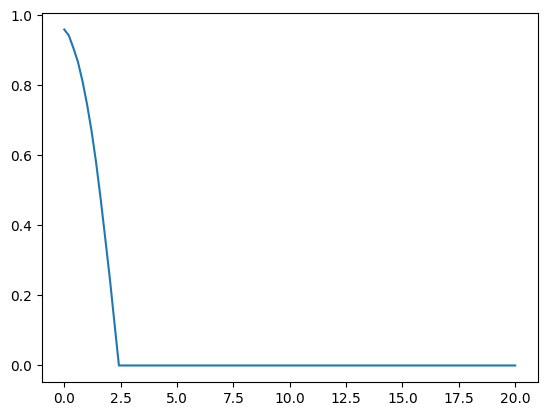

In [22]:
plt.plot(var_x,r2_alphas)
plt.show()

In [23]:
model_lasso.coef_


array([-0.        , -0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.01069211, -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.  

Obsrevacion: 
- El modelo usa muchas variables que aportan poco a la eficacia del modelo, elevando el sobreajuste y ruido.
- Ridge fue la mejor opción ya que redujo el sobreajuste sin perder información util.
- Lasso eliminó casi todas las columnas dejando solo tres variables.
Debido a que solo 3 columnas estan relacionadas con la variable diabetes, se tomarán en cuenta las columnas con los coeficientes mas relacionados al target (46 - 77 - 93) en el siguiente analisis.

In [35]:
print(f'la columna numero 46: {df.columns[46]}')
print(f'la columna numero 77: {df.columns[77]}')
print(f'la columna numero 93: {df.columns[93]}')

la columna numero 46: Percent of adults with a high school diploma only 2014-18
la columna numero 77: Percent of Population Aged 60+
la columna numero 93: Heart disease_Upper 95% CI


In [36]:
df3 = df[['Percent of adults with a high school diploma only 2014-18', 
         'Percent of Population Aged 60+', 
         'Heart disease_Upper 95% CI','diabetes_prevalence']]
df3

,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI,diabetes_prevalence
0,32.6,19.1,8.7,12.9
1,27.6,26.3,8.7,12.0
2,35.7,23.5,11.8,19.7
3,47.3,21.1,9.3,14.1
4,34.0,23.6,10.1,13.5
...,...,...,...,...
3135,33.3,15.8,6.4,8.9
3136,13.2,18.7,5.8,7.2
3137,40.1,17.1,7.9,10.4
3138,30.3,26.7,9.0,11.3


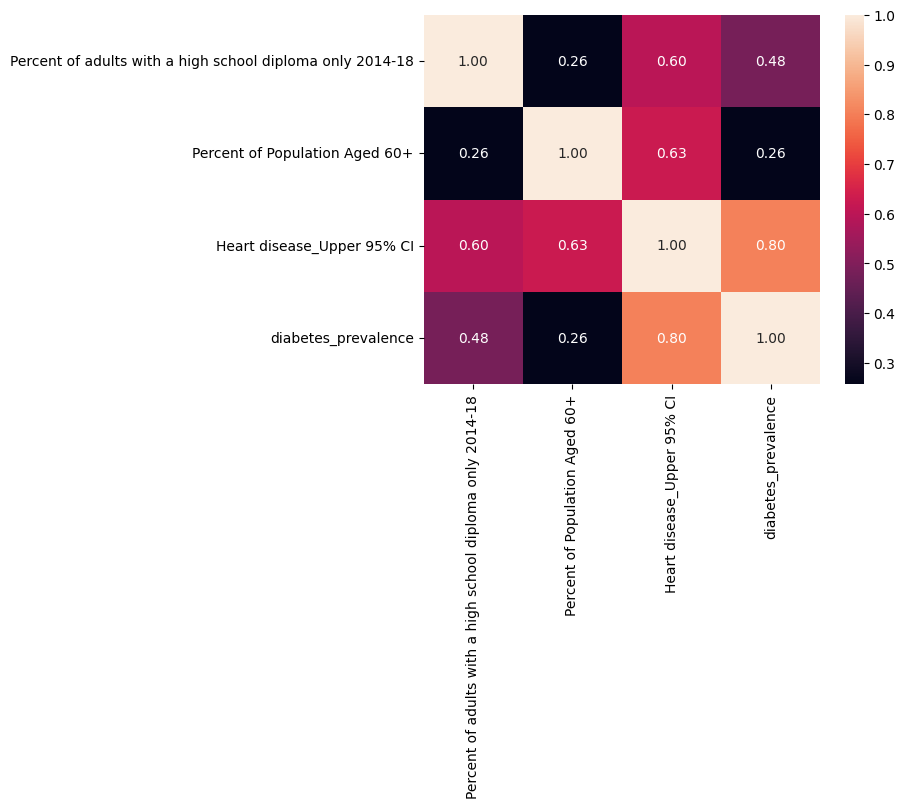

In [37]:
colum_corr =['Percent of adults with a high school diploma only 2014-18', 
         'Percent of Population Aged 60+', 
         'Heart disease_Upper 95% CI','diabetes_prevalence']
sns.heatmap(df3[colum_corr].corr(),annot=True,fmt='.2f')
plt.show()

In [38]:
vari_n =['Percent of adults with a high school diploma only 2014-18', 
         'Percent of Population Aged 60+', 
         'Heart disease_Upper 95% CI']

X = df3[vari_n]
y = df3['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [42]:
#EScalado
scaler = StandardScaler()
scaler.fit(X_train)
xtrain_escalados = scaler.transform(X_train)
xtest_escalados = scaler.transform(X_test)

X_train_esc = pd.DataFrame(xtrain_escalados,index=X_train.index,columns=X_train.columns)
X_test_esc = pd.DataFrame(xtest_escalados,index=X_test.index,columns=X_test.columns)

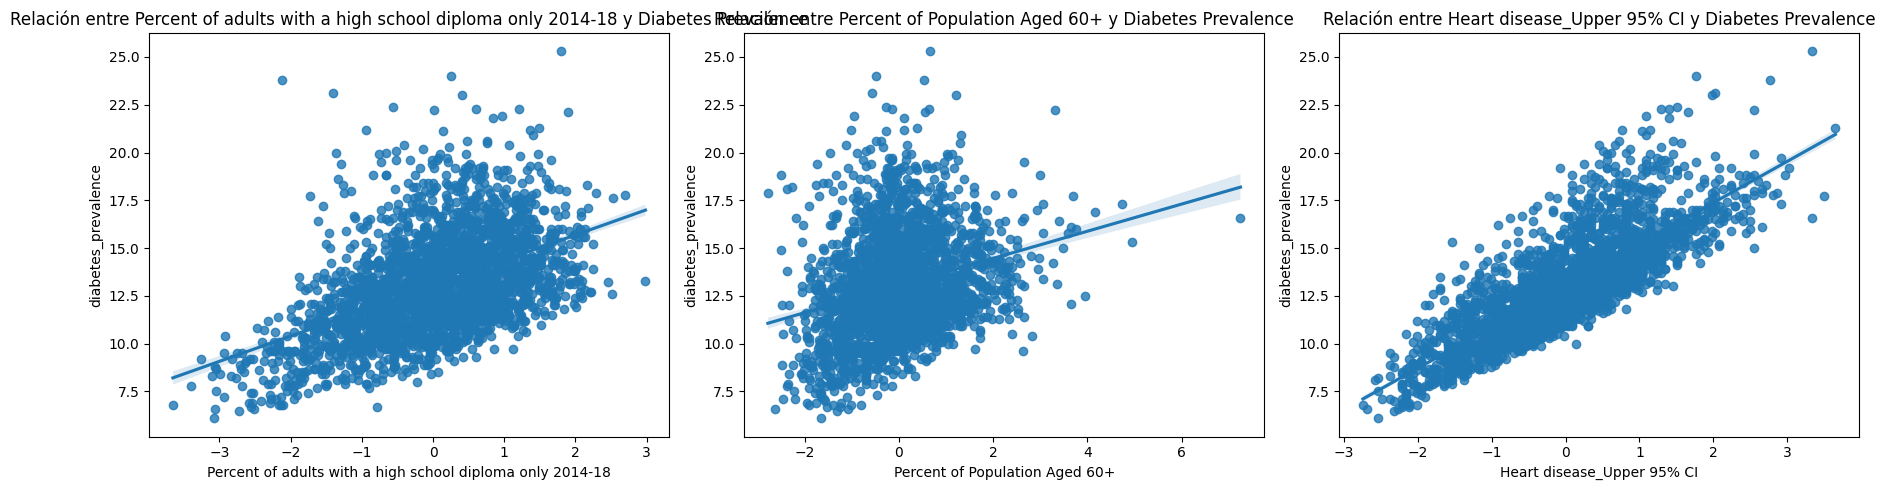

In [43]:
#Visualización
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(vari_n):
    sns.regplot(x=X_train_esc[col], y=y_train, ax=axes[i])
    axes[i].set_title(f'Relación entre {col} y Diabetes Prevalence')

plt.tight_layout()
plt.show()

Se observa que la variable Heart disease_Upper 95% CI con respecto a nuestra variable objetivo mantiene una linealidad y homoscedasticidad en la recta. Esto se debe a que esta variable representa un 0,80 de correlación con nuestro target diabetes_prevalence.

In [49]:
#Iniciación y entrenamiento del modelo
model_rl = LinearRegression() 
model_rl.fit(X_train_esc, y_train) 

LinearRegression()

In [52]:
print(f"Intercepto (a): {model_rl.intercept_}")
print(f"Coeficientes (b): {model_rl.coef_}")

Intercepto (a): 13.041640127388533
Coeficientes (b): [-0.16563827 -1.10881662  2.96437217]


In [54]:
#prediccion :
y_pred = model_rl.predict(X_test_esc)


In [59]:
#METRICAS
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R2): {r2:.2f}")

Error cuadrático medio (MSE): 1.96
Coeficiente de determinación (R2): 0.76


Observación:
- El modelo emperoró significativamente al solo mantener las variables significativas en nuestra variable objetivo 
- Algunas de esas 107 variables podrían estar correlacionadas con las 3 importantes, aportando información indirecta otorgando multicolinealidad.
- Aunque el primer modelo es mejor, pudo haber sido un r2 artificial por el sobreajuste.

In [61]:
# Aplicando Ridge
ridge = Ridge(alpha=1)  # Puedes probar distintos valores de alpha
ridge.fit(X_train_esc, y_train)
print(f"Ridge R2: {ridge.score(X_test_esc, y_test)}")

# Aplicando Lasso
lasso = Lasso(alpha=0.01)  # Ajusta el alpha para controlar qué variables se eliminan
lasso.fit(X_train_esc, y_train)
print(f"Lasso R2: {lasso.score(X_test_esc, y_test)}")

Ridge R2: 0.7558561443152216
Lasso R2: 0.7548647531782063


Aplicando las metricas Lasso y Ridge no se observa optimización del modelo.